Wskaźnik newsów - PKN Orlen
=========================

Notowanie
---------------

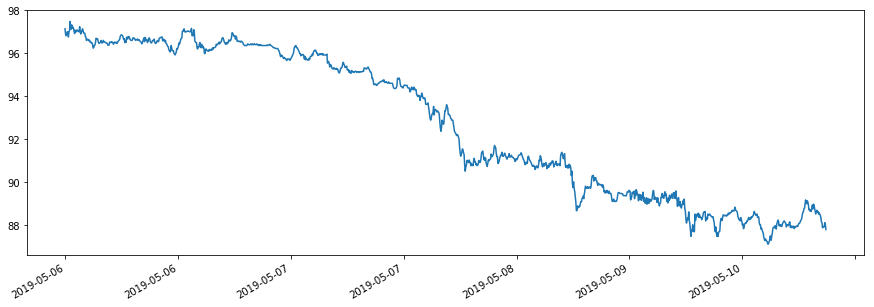

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('PKNORLEN','20190512')    
ph.plot(data)                        


Analiza Twittów
----------------------

In [3]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'PKNORLEN' : {
                    'search': ['pkn orlen','ropa'] ,
                    'ignore':['uroczystość','ochotniczy','medal','bolid','smaczny','hot dog','medalistka','Lotta','kadet','bieg','sponsor',
                              'Duszyński','Małachowski','Wyciszkiewicz','Kszczot','Lisek','Kubica','Dąbrowskiego',
                              'RobertKubicaKlub','WilliamsRacing','Williams','AkademiiInwestowania'],
                    'sentiment':{
                        'kuluary':-1,
                        'wydać':-1,
                        'przesłuchiwać':-1,
                        'skazić':-1,
                        'brudny':-1,
                        'zanieczyścić':-1,
                        'zakręcić':-1,
                        'kryzys':-1,
                        'zakazić':-1,
                        'lepsza':1,
                        'tańszy':1,
                        'zyskać':1,
                        'konsolidacja':1,
                        'czysty':1
                        }
                    }
               }

twt =  twp.indicator('PKNORLEN','20190512')
for t in twt:
    if not t.ignore and t.power>100000 and t.sentiment==0:
        print('==========================================')
        print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date) +' ' + t.text)


103440 [] 2019-05-12 10:19:50 @ wjakobik @ PKN_ORLEN @ DanielObajtek @ BartSaw Co za `` dress-code '' ; ) 
927970 [] 2019-05-11 16:30:05 do n't miss tomorrow 's # SpanishGP ! 🇪🇸 Check out the start Time courtesy of our partners @ PKN_ORLEN 👍 https : //t.co/iXgQrNL0Ku 
118523 ['zanieczyścić', 'zyskać'] 2019-05-10 06:10:37 wszyscy zyskać na fuzja @ PKN_ORLEN I @ GrupaLOTOS - mówić ja prezes @ DanielObajtek . Nie wiedzieć Co na ten biuro spółka gdańska . prezes Orlen mówić tężyć O zanieczyścić Ropa . Nie zaszkodzić na szczęście polskie rafineria . gorzeć Z Mozyrz na Białoruś https : //t.co/uj7jjUNPM7 https : //t.co/RsKPQpexP3 
385457 [] 2019-05-09 13:37:32 przekazać radiowóz przez @ PKN_ORLEN odbyć się w krajowy szkoła skarbowość w Otwock , który być centrum szkolić pracownik I funkcjonariusz # kasa . w KSS prowadzony być specjalistyczny szkolić teoretyczny I praktyczny ćwiczenia grupa realizacyjny służba Celno-Skarbowej https : //t.co/Rt0I7I7RA8 
160269 [] 2019-05-09 09:02:24 15 hybrydow

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

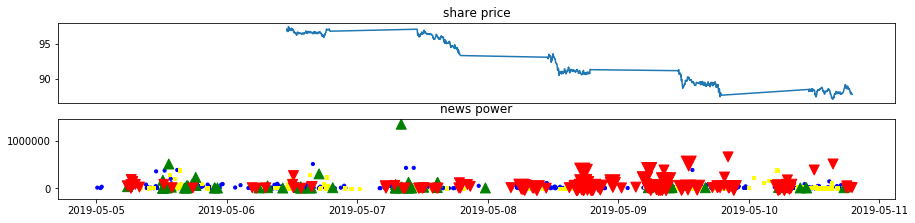

In [4]:
import plot_helper 
plot_helper.plot2(data,twt)